In [6]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='bd2b6a2d-41ae-497d-a674-0ce8ad8a2527', project_access_token='p-f4dc48a2256013fd27d5b681c8bd5f519652a6e4')
pc = project.project_context


In [4]:
%matplotlib inline
!conda install -c conda-forge wikipedia --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge wordcloud==1.4.1 --yes
import wikipedia as wp
import pandas as pd
import requests
import io
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')
import os

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [5]:
#first we extract the data from the following link https://geo.nyu.edu/catalog/nyu-2451-34572
#which can also be downloaded from the link that shows below
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
# as the relevant information of the neighborhoods is in 'features', we store those values in a new variable
neighborhoods_data = newyork_data['features']
#and we take a look at one of its elements
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [9]:
#we set a new dataframe for this information
column_names = ['Borough','Neighborhood','Latitude','Longitude']
neighborhoods = pd.DataFrame(columns=column_names)
#and we can now see the following empty dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude


In [10]:
#we fill the data in the dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    

In [11]:
neighborhoods['Borough'].unique()
#as we can see, we have 5 boroughs, 

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [12]:
file = project.get_file("DOHMH_Farmers_Markets.xls")

farmer_market = pd.read_csv(file)
farmer_market.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [13]:

#we now create a map of new york city with neighborhoods as dots 
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = str(neighborhood)+str(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Text(0.5, 1.0, 'Farm markets per Borough')

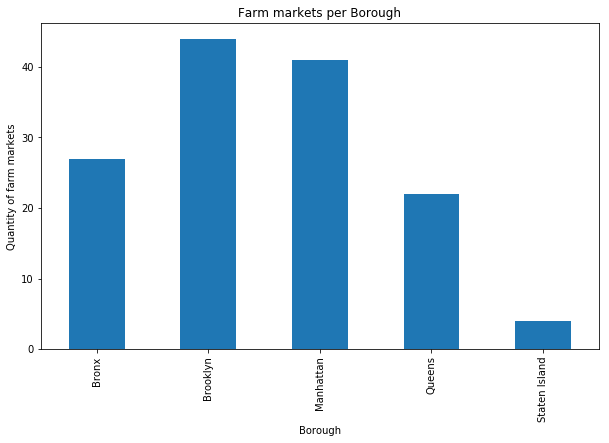

In [15]:
df_farm_barplot = farmer_market.groupby(['Borough'])['Borough'].count()
df_farm_barplot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Borough')
plt.ylabel('Quantity of farm markets')
plt.title('Farm markets per Borough')

In [16]:
#we now create a map for the farm markets in new york 
map_newyork_farm = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, mark_name in zip(farmer_market['Latitude'], farmer_market['Longitude'], farmer_market['Borough'], farmer_market['Market Name']):
    label = str(mark_name)+str(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_farm)  
    
map_newyork_farm

In [18]:
#We now get the data from the wikipedia, about New York population
html = wp.page("Boroughs of New York City").html().encode("UTF-8")
df_population = pd.read_html(html)[0]
df_population.columns = ['Borough','County','Estimate_2017','billions','per capita','square_miles','suare_km','persons_sq_mi,','persons_km2']
df_population = df_population.head(7)
df_population

,Borough,County,Estimate_2017,billions,per capita,square_miles,suare_km,"persons_sq_mi,",persons_km2
0,The Bronx,Bronx,1471160,42.695,29200,42.10,109.04,34653,13231
1,Brooklyn,Kings,2648771,91.559,34600,70.82,183.42,37137,14649
2,Manhattan,New York,1664727,600.244,360600,22.83,59.13,72033,27826
3,Queens,Queens,2358582,93.310,39600,108.53,281.09,21460,8354
4,Staten Island,Richmond,479458,14.514,30300,58.37,151.18,8112,3132
5,City of New York,City of New York,8622698,842.343,97700,302.64,783.83,28188,10947
6,State of New York,State of New York,19849399,1701.399,85700,47214,122284,416.4,159


In [19]:
#Now, we create a new dataframe based on demographics information from wikipedia
data = [['44.0','52.3','76.6','93.6'],['33.3','43.2','62.9','92.0'],['25.5','28.7','21.1','6.1'],['28.6','24.4','16.2','1.6'],['12.7','7.0','1.2','-']]
df_demographics = pd.DataFrame(data,columns=['2010','1990','1970','1940'],index=['White','NonHispanic','Black or African American','Hispanic or Latino (of any race)','Asian'])
df_demographics

,2010,1990,1970,1940
White,44.0,52.3,76.6,93.6
NonHispanic,33.3,43.2,62.9,92.0
Black or African American,25.5,28.7,21.1,6.1
Hispanic or Latino (of any race),28.6,24.4,16.2,1.6
Asian,12.7,7.0,1.2,-


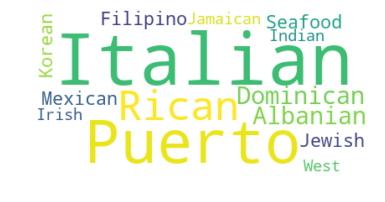

In [20]:
#We now gather new york's cuisine information from wikipedia to create word clouds
#For Bronx
bronx='Mexican, Puerto Rican, Dominican, Korean,Italian, Albanian,Italian, Seafood,Italian,Albanian,Filipino,Jewish,Puerto Rican, Dominican,Jamaican, West Indian,Irish'
stopwords_bronx = set(STOPWORDS)
bronx_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords_bronx
)

# generate the word cloud
bronx_wc.generate(bronx)
# display the word cloud
plt.imshow(bronx_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

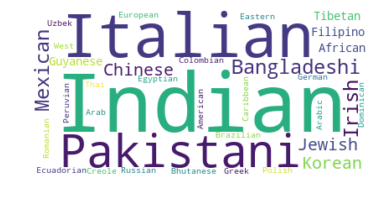

In [21]:
#For Queens
queens='Greek, Italian, Eastern European, Brazilian, Egyptian, Arabic,Indian,Pakistani,Chinese,Korean,Jewish, Russian,Uzbek,Italian,German,Polish,Indian, Pakistani, Bangladeshi, Colombian, Ecuadorian, Peruvian, Korean, Filipino, Thai, Tibetan, Bhutanese,Mexican,Bangladeshi, Caribbean, African-American, African,Creole,Arab,Chinese,Italian,Indian, Guyanese, West Indian, Pakistani, Bangladeshi,Irish, Jewish, Irish, Dominican, Mexican, Guyanese,Filipino, Irish, Mexican, Tibetan, Romanian'
stopwords_queens = set(STOPWORDS)
queens_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords_queens)

queens_wc.generate(queens)
plt.imshow(queens_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

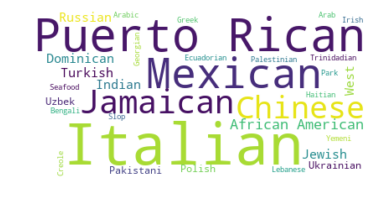

In [22]:
#for brooklyn
brooklyn = ' Irish, Italian, Greek, Turkish, Lebanese, Palestinian, Yemeni,Arabic,African-American, Jamaican, Trinidadian, Puerto Rican, West Indian,Italian, Chinese, Turkish, Russian, Mexican, Uzbek,Jewish, Italian, Mexican, Chinese,Russian, Georgian, Turkish, Pakistani, Ukrainian, Puerto Rican, Mexican, Dominican,Ecuadorian,Jamaican, West Indian, African-American,Italian,Jamaican, West Indian, Jewish,African-American, Dominican,Puerto Rican, Jamaican, Haitian, Creole, Polish, Ukrainian,Bengali, Pakistani, Mexican, Uzbek, Polish, Park Slop, Puerto Rican, African-American, Italian,Seafood, Chinese, Russian,Italian,Puerto Rican, Chinese, Arab, Mexican, Italian,Italian, Jewish, Dominican, Puerto Rican'
stopwords_brooklyn = set(STOPWORDS)
brooklyn_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords_brooklyn)

brooklyn_wc.generate(brooklyn)
plt.imshow(brooklyn_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

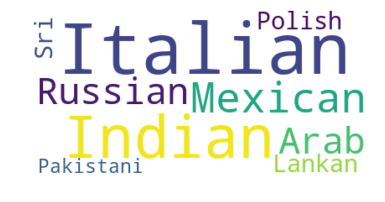

In [23]:
#for staten island
staten_island = 'Mexican, Indian, Italian,Italian, Russian, Arab, Polish,Italian, Sri Lankan, Pakistani, Indian'
stopwords_staten_island = set(STOPWORDS)
staten_island_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords_staten_island)

staten_island_wc.generate(staten_island)
plt.imshow(staten_island_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

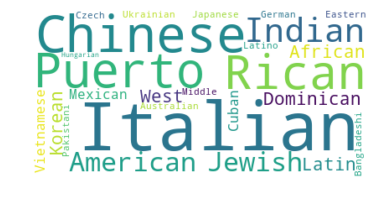

In [24]:
#for manhattan 
manhattan = 'Chinese, Vietnamese,Puerto Rican, Mexican, Dominican, Chinese-Cuban, Italian,Japanese, Korean, Indian, Ukrainian, Italian, Middle Eastern,Italian, African-American, Latin American, West Indian,West African,Korean,Australian,Italian,Puerto Rican, Jewish, Italian, Latin American,Indian, Pakistani,Bangladeshi,Jewish, Chinese-Latino,Dominican, Puerto Rican, Italian ,Jewish,German, Czech, Hungarian'
stopwords_manhattan = set(STOPWORDS)
manhattan_wc = WordCloud(
    background_color='white',
    max_words = 2000,
    stopwords = stopwords_manhattan)

manhattan_wc.generate(manhattan)
plt.imshow(manhattan_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
#We will now create a map of manhattan and brooklyn neighborhoods
options = ['Manhattan','Brooklyn']
options_all = ['Manhattan','Brooklyn','Bronx','Staten Island','Queens']
options_remaining= ['Bronx','Staten Island','Queens']
brookandman_df = neighborhoods.loc[neighborhoods['Borough'].isin(options)]
brookandman_df
remaining_df = neighborhoods.loc[neighborhoods['Borough'].isin(options_remaining)]
remaining_df



,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446
10,Bronx,Baychester,40.866858,-73.835798


In [26]:
# create map of brooklyn and manhattan using latitude and longitude values
map_manybrook = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(brookandman_df['Latitude'], brookandman_df['Longitude'], brookandman_df['Borough'], brookandman_df['Neighborhood']):
    label = str(neighborhood)+str(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_manybrook)  
    
map_manybrook

In [27]:
#We will now use the Foursquare API to explore the neighborhoods and segment them.
CLIENT_ID = 'C0REZ5CQOEWCJC1NNCREDCJRMK0QNKPJJQZNZG02TDMBYM5B' #  Foursquare ID
CLIENT_SECRET = 'SGHJNHX5KSZHFHG3QVCKFIVMLLXEQLA3P0QJRFDJWAC5PPWI' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: C0REZ5CQOEWCJC1NNCREDCJRMK0QNKPJJQZNZG02TDMBYM5B
CLIENT_SECRET:SGHJNHX5KSZHFHG3QVCKFIVMLLXEQLA3P0QJRFDJWAC5PPWI


In [28]:
#making a procedure to get near venues, top 50 in a radius of 200 meters
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        #creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #returning only relevant info for earch venue 
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return nearby_venues

In [141]:
#now we call the function and create a dataframe
brookandMan_venues = getNearbyVenues(names=brookandman_df['Neighborhood'],
                                 latitudes=brookandman_df['Latitude'],
                                 longitudes=brookandman_df['Longitude'])

remaining_venues = getNearbyVenues(names=remaining_df['Neighborhood'],
                                 latitudes=remaining_df['Latitude'],
                                 longitudes=remaining_df['Longitude'])

Marble Hill


KeyError: 'groups'

In [142]:

brookandMan_restaurants = brookandMan_venues.loc[brookandMan_venues['Venue Category'].str.endswith('Restaurant'),'Venue Category'].values
print(brookandMan_restaurants)
brookandMan_venues.head()

brookandMan_restaurants_df = brookandMan_venues.loc[brookandMan_venues['Venue Category'].isin(brookandMan_restaurants)]
brookandMan_restaurants_df.reset_index(inplace=True,drop=True)
brookandMan_restaurants_df.head()

['Seafood Restaurant' 'American Restaurant' 'Caucasian Restaurant' ...
 'Tapas Restaurant' 'Pakistani Restaurant' 'Restaurant']


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Land & Sea Restaurant,40.877885,-73.905873,Seafood Restaurant
1,Marble Hill,40.876551,-73.910660,Boston Market,40.877430,-73.905412,American Restaurant
2,Bay Ridge,40.625801,-74.030621,Georgian Dream Cafe and Bakery,40.625586,-74.030196,Caucasian Restaurant
3,Bay Ridge,40.625801,-74.030621,Karam,40.622931,-74.028316,Middle Eastern Restaurant
4,Bay Ridge,40.625801,-74.030621,Elia Restaurant,40.623090,-74.031156,Greek Restaurant


In [143]:
#now for the remaining boroughs 

remaining_venues


remaining_restaurants = remaining_venues.loc[remaining_venues['Venue Category'].str.endswith('Restaurant'),'Venue Category'].values
print(remaining_restaurants)

remaining_restaurants_df = remaining_venues.loc[remaining_venues['Venue Category'].isin(remaining_restaurants)]
remaining_restaurants_df.reset_index(inplace=True,drop=True)
remaining_restaurants_df.head()

['Caribbean Restaurant' 'Fast Food Restaurant' 'Restaurant'
 'Chinese Restaurant' 'Caribbean Restaurant' 'Seafood Restaurant'
 'Caribbean Restaurant' 'Caribbean Restaurant' 'Fast Food Restaurant'
 'Chinese Restaurant' 'Latin American Restaurant' 'Caribbean Restaurant'
 'Mexican Restaurant' 'Spanish Restaurant' 'Spanish Restaurant'
 'Mexican Restaurant' 'Mexican Restaurant' 'Seafood Restaurant'
 'Latin American Restaurant' 'Latin American Restaurant'
 'Fast Food Restaurant' 'Italian Restaurant' 'Indian Restaurant'
 'American Restaurant' 'Mexican Restaurant' 'Restaurant'
 'Caribbean Restaurant' 'Spanish Restaurant' 'Fast Food Restaurant'
 'American Restaurant' 'Chinese Restaurant' 'Caribbean Restaurant'
 'Spanish Restaurant' 'Mexican Restaurant' 'Fast Food Restaurant'
 'American Restaurant' 'Italian Restaurant' 'Chinese Restaurant'
 'Sushi Restaurant' 'Italian Restaurant' 'Mexican Restaurant'
 'Thai Restaurant' 'Italian Restaurant' 'Seafood Restaurant'
 'French Restaurant' 'Seafood Resta

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
1,Co-op City,40.874294,-73.829939,Arby's,40.870280,-73.828611,Fast Food Restaurant
2,Co-op City,40.874294,-73.829939,Townhouse Restaurant,40.876086,-73.828868,Restaurant
3,Co-op City,40.874294,-73.829939,Guang Hui Chinese Restaurant,40.876651,-73.829092,Chinese Restaurant
4,Eastchester,40.887556,-73.827806,Fish & Ting,40.885656,-73.829197,Caribbean Restaurant


In [144]:

remaining_restaurants = remaining_venues.loc[remaining_venues['Venue Category'].str.endswith('Restaurant'),'Venue Category'].values
print(remaining_restaurants)

remaining_restaurants_df = remaining_venues.loc[remaining_venues['Venue Category'].isin(remaining_restaurants)]
remaining_restaurants_df.reset_index(inplace=True,drop=True)
remaining_restaurants_df.head()

['Caribbean Restaurant' 'Fast Food Restaurant' 'Restaurant'
 'Chinese Restaurant' 'Caribbean Restaurant' 'Seafood Restaurant'
 'Caribbean Restaurant' 'Caribbean Restaurant' 'Fast Food Restaurant'
 'Chinese Restaurant' 'Latin American Restaurant' 'Caribbean Restaurant'
 'Mexican Restaurant' 'Spanish Restaurant' 'Spanish Restaurant'
 'Mexican Restaurant' 'Mexican Restaurant' 'Seafood Restaurant'
 'Latin American Restaurant' 'Latin American Restaurant'
 'Fast Food Restaurant' 'Italian Restaurant' 'Indian Restaurant'
 'American Restaurant' 'Mexican Restaurant' 'Restaurant'
 'Caribbean Restaurant' 'Spanish Restaurant' 'Fast Food Restaurant'
 'American Restaurant' 'Chinese Restaurant' 'Caribbean Restaurant'
 'Spanish Restaurant' 'Mexican Restaurant' 'Fast Food Restaurant'
 'American Restaurant' 'Italian Restaurant' 'Chinese Restaurant'
 'Sushi Restaurant' 'Italian Restaurant' 'Mexican Restaurant'
 'Thai Restaurant' 'Italian Restaurant' 'Seafood Restaurant'
 'French Restaurant' 'Seafood Resta

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
1,Co-op City,40.874294,-73.829939,Arby's,40.870280,-73.828611,Fast Food Restaurant
2,Co-op City,40.874294,-73.829939,Townhouse Restaurant,40.876086,-73.828868,Restaurant
3,Co-op City,40.874294,-73.829939,Guang Hui Chinese Restaurant,40.876651,-73.829092,Chinese Restaurant
4,Eastchester,40.887556,-73.827806,Fish & Ting,40.885656,-73.829197,Caribbean Restaurant


In [145]:
#now we analyze each neighborbood, for brooklyn and manhattan
brookandMan_restaurants_df_analyzed = pd.get_dummies(brookandMan_restaurants_df[['Venue Category']], prefix="", prefix_sep="")
brookandMan_restaurants_df_analyzed['Neighborhood']=brookandMan_restaurants_df['Neighborhood']
fixed_columns = [brookandMan_restaurants_df_analyzed.columns[-1]] + list(brookandMan_restaurants_df_analyzed.columns[:-1])
brookandMan_restaurants_df_analyzed = brookandMan_restaurants_df_analyzed[fixed_columns]


brookandMan_restaurants_df_grouped = brookandMan_restaurants_df_analyzed.groupby('Neighborhood').mean().reset_index()
brookandMan_restaurants_df_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Bath Beach,0.0,0.0,0.000000,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.000000,0.166667,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.055556,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0,0.111111,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055556,0.0,0.0,0.0,0.000000
1,Battery Park City,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0,0.285714,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,Bay Ridge,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.074074,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000,0.037037,0.0,0.185185,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.037037,0.037037,0.037037,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.037037,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.074074,0.0,0.0,0.0,0.0,0.074074,0.0,0.0,0.000000,0.0,0.0,0.0,0.037037
3,Bedford Stuyvesant,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,Bensonhurst,0.0,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125,0.000000,0.0,0.250000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0

In [146]:
#now we do the same for the remaining  boroughs 

remaining_restaurants_df_analyzed = pd.get_dummies(remaining_restaurants_df[['Venue Category']], prefix="", prefix_sep="")
remaining_restaurants_df_analyzed['Neighborhood']=remaining_restaurants_df['Neighborhood']
fixed_columns = [remaining_restaurants_df_analyzed.columns[-1]] + list(remaining_restaurants_df_analyzed.columns[:-1])
remaining_restaurants_df_analyzed = remaining_restaurants_df_analyzed[fixed_columns]


remaining_restaurants_df_grouped = remaining_restaurants_df_analyzed.groupby('Neighborhood').mean().reset_index()
remaining_restaurants_df_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Paella Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Allerton,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arlington,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arrochar,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arverne,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [147]:
#we now print each neighborhood with the top 5 most common venues, (for brooklyn and manhattan)
num_top_venues = 5

for hood in brookandMan_restaurants_df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brookandMan_restaurants_df_grouped[brookandMan_restaurants_df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.17
1    Italian Restaurant  0.11
2  Fast Food Restaurant  0.11
3    Dim Sum Restaurant  0.06
4    Spanish Restaurant  0.06


----Battery Park City----
                      venue  freq
0        Italian Restaurant  0.29
1       American Restaurant  0.14
2  Mediterranean Restaurant  0.14
3        Mexican Restaurant  0.14
4          Sushi Restaurant  0.14


----Bay Ridge----
                 venue  freq
0   Italian Restaurant  0.19
1  American Restaurant  0.11
2     Greek Restaurant  0.11
3   Chinese Restaurant  0.07
4      Thai Restaurant  0.07


----Bedford Stuyvesant----
                     venue  freq
0  New American Restaurant   0.5
1      Japanese Restaurant   0.5
2        Paella Restaurant   0.0
3       Russian Restaurant   0.0
4               Restaurant   0.0


----Bensonhurst----
                    venue  freq
0      Italian Restaurant  0.25
1        Sushi Restaurant  0.25
2  Shabu-Shabu Restaurant  0.1

In [148]:
#we now print each neighborhood with the top 5 most common venues, (for the remaining boroughs)
num_top_venues = 5

for hood in remaining_restaurants_df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = remaining_restaurants_df_grouped[remaining_restaurants_df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0    Chinese Restaurant   0.6
1  Fast Food Restaurant   0.2
2    Spanish Restaurant   0.2
3     Afghan Restaurant   0.0
4   Peruvian Restaurant   0.0


----Annadale----
                       venue  freq
0        American Restaurant  0.67
1                 Restaurant  0.33
2          Afghan Restaurant  0.00
3     Shabu-Shabu Restaurant  0.00
4  Latin American Restaurant  0.00


----Arlington----
                       venue  freq
0        American Restaurant   1.0
1          Afghan Restaurant   0.0
2     Shabu-Shabu Restaurant   0.0
3  Latin American Restaurant   0.0
4           Malay Restaurant   0.0


----Arrochar----
                       venue  freq
0         Italian Restaurant   0.4
1   Mediterranean Restaurant   0.2
2  Middle Eastern Restaurant   0.2
3          Polish Restaurant   0.2
4          Korean Restaurant   0.0


----Arverne----
                       venue  freq
0            Thai Restaurant   1.0
1          Afghan Restauran

In [149]:
#creating a function that sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [150]:
#creating a new dataframe and displaying the top 10 venues for each neighborhood (brooklyn and manhattan)
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_man = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_man['Neighborhood'] = brookandMan_restaurants_df_grouped['Neighborhood']

for ind in np.arange(brookandMan_restaurants_df_grouped.shape[0]):
    neighborhoods_venues_sorted_man.iloc[ind, 1:] = return_most_common_venues(brookandMan_restaurants_df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_man.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Restaurant,Dim Sum Restaurant,German Restaurant,Cantonese Restaurant,Middle Eastern Restaurant,Peruvian Restaurant
1,Battery Park City,Italian Restaurant,American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,Falafel Restaurant,Fast Food Restaurant
2,Bay Ridge,Italian Restaurant,American Restaurant,Greek Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Caucasian Restaurant,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant
3,Bedford Stuyvesant,New American Restaurant,Japanese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
4,Bensonhurst,Italian Restaurant,Sushi Restaurant,American Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant


In [151]:
#creating a new dataframe and displaying the top 10 venues for each neighborhood (for the remaining boroughs)
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_rem = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_rem['Neighborhood'] = remaining_restaurants_df_grouped['Neighborhood']

for ind in np.arange(remaining_restaurants_df_grouped.shape[0]):
    neighborhoods_venues_sorted_rem.iloc[ind, 1:] = return_most_common_venues(remaining_restaurants_df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_rem.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Chinese Restaurant,Spanish Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Filipino Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,French Restaurant,Dumpling Restaurant
1,Annadale,American Restaurant,Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
2,Arlington,American Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
3,Arrochar,Italian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant,Eastern European Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
4,Arverne,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant


In [152]:

#running now kmeans to cluster the neighborhood into 2 clusters 
#for brooklyn and manhattan
#we first set the number of clusters
kclusters = 2

brookandMan_restaurants_clustering = brookandMan_restaurants_df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brookandMan_restaurants_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [153]:

#running now kmeans to cluster the neighborhood into 2 clusters 
#for the remaining boroughs
#we first set the number of clusters
kclusters = 2

remaining_restaurants_clustering = remaining_restaurants_df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(remaining_restaurants_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

In [160]:
#we now create a new dataframe, which includes the cluster and the top 10 venues for each neighborhood
#for brooklyn and manhattan
print(neighborhoods_venues_sorted_man.shape)
# add clustering labels
neighborhoods_venues_sorted_man.insert(0, 'Cluster Labels', pd.Series(kmeans.labels_))

brookandman_merged = brookandman_df
brookandman_merged.head()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brookandman_merged = brookandman_merged.join(neighborhoods_venues_sorted_man.set_index('Neighborhood'), on='Neighborhood')
brookandman_merged.head()

(104, 12)


ValueError: cannot insert Cluster Labels, already exists

In [179]:
brookandman_merged= brookandman_merged.dropna()
brookandman_merged.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manhattan,Marble Hill,40.876551,-73.910660,0.0,Seafood Restaurant,American Restaurant,Halal Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
46,Brooklyn,Bay Ridge,40.625801,-74.030621,0.0,Italian Restaurant,American Restaurant,Greek Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Caucasian Restaurant,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant
47,Brooklyn,Bensonhurst,40.611009,-73.995180,0.0,Italian Restaurant,Sushi Restaurant,American Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant
48,Brooklyn,Sunset Park,40.645103,-74.010316,0.0,Latin American Restaurant,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
49,Brooklyn,Greenpoint,40.730201,-73.954241,0.0,Sushi Restaurant,Mexican Restaurant,French Restaurant,Italian Restaurant,New American Restaurant,Polish Restaurant,Restaurant,Indian Restaurant,Falafel Restaurant,Vietnamese Restaurant
50,Brooklyn,Gravesend,40.595260,-73.973471,0.0,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
51,Brooklyn,Brighton Beach,40.576825,-73.965094,1.0,Eastern European Restaurant,Restaurant,Russian Restaurant,Sushi Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Korean Restaurant,Australian Restaurant,Austrian Restaurant,Falafel Restaurant
52,Brooklyn,Sheepshead Bay,40.586890,-73.943186,0.0,Turkish Restaurant,Restaurant,American Restaurant,Italian Restaurant,Russian Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
53,Brooklyn,Manhattan Terrace,40.614433,-73.957438,0.0,Eastern European Restaurant,Japanese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
54,Brooklyn,Flatbush,40.636326,-73.958401,0.0,Mexican Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant


In [167]:
#we now create a new dataframe, which includes the cluster and the top 10 venues for each neighborhood
#for the remaining boroughs
print(neighborhoods_venues_sorted_rem.shape)
# add clustering labels
neighborhoods_venues_sorted_rem.insert(0, 'Cluster Labels', pd.Series(kmeans.labels_))

remaining_merged = remaining_df
remaining_merged.head()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
remaining_merged = remaining_merged.join(neighborhoods_venues_sorted_rem.set_index('Neighborhood'), on='Neighborhood')

remaining_merged.head()

(162, 12)


ValueError: cannot insert Cluster Labels, already exists

In [178]:
remaining_merged=remaining_merged.dropna()
remaining_merged.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Fast Food Restaurant,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Filipino Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,French Restaurant,Dumpling Restaurant
5,Bronx,Kingsbridge,40.881687,-73.902818,0.0,Mexican Restaurant,Latin American Restaurant,Spanish Restaurant,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Empanada Restaurant,Falafel Restaurant,Filipino Restaurant,Vietnamese Restaurant
7,Bronx,Woodlawn,40.898273,-73.867315,1.0,Italian Restaurant,Indian Restaurant,American Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
8,Bronx,Norwood,40.877224,-73.879391,0.0,Mexican Restaurant,Caribbean Restaurant,Fast Food Restaurant,Chinese Restaurant,Spanish Restaurant,Restaurant,American Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
9,Bronx,Williamsbridge,40.881039,-73.857446,0.0,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
10,Bronx,Baychester,40.866858,-73.835798,0.0,Mexican Restaurant,American Restaurant,Fast Food Restaurant,Spanish Restaurant,Vietnamese Restaurant,Empanada Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
11,Bronx,Pelham Parkway,40.857413,-73.854756,1.0,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Dumpling Restaurant
12,Bronx,City Island,40.847247,-73.786488,0.0,Seafood Restaurant,Spanish Restaurant,French Restaurant,Italian Restaurant,American Restaurant,Arepa Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant


In [180]:
#we now visualize the resulting clusters 
# create map
map_clusters_brook = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brookandman_merged['Latitude'], brookandman_merged['Longitude'], brookandman_merged['Neighborhood'], brookandman_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_brook)
       
map_clusters_brook

In [182]:
#we now visualize the resulting clusters
#for the remaining boroughs
# create map
map_clusters_rem = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(remaining_merged['Latitude'], remaining_merged['Longitude'], remaining_merged['Neighborhood'], remaining_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters_rem)
       
map_clusters_rem

In [183]:
#Now taking a look at the clusters for brook and manhattan
#Cluster 1
brookandman_merged.loc[brookandman_merged['Cluster Labels'] == 0, brookandman_merged.columns[[1] + list(range(5, brookandman_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Marble Hill,Seafood Restaurant,American Restaurant,Halal Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
46,Bay Ridge,Italian Restaurant,American Restaurant,Greek Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Caucasian Restaurant,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant
47,Bensonhurst,Italian Restaurant,Sushi Restaurant,American Restaurant,Shabu-Shabu Restaurant,Hotpot Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant
48,Sunset Park,Latin American Restaurant,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
49,Greenpoint,Sushi Restaurant,Mexican Restaurant,French Restaurant,Italian Restaurant,New American Restaurant,Polish Restaurant,Restaurant,Indian Restaurant,Falafel Restaurant,Vietnamese Restaurant
50,Gravesend,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
52,Sheepshead Bay,Turkish Restaurant,Restaurant,American Restaurant,Italian Restaurant,Russian Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
53,Manhattan Terrace,Eastern European Restaurant,Japanese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
54,Flatbush,Mexican Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
55,Crown Heights,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant


In [184]:
#Cluster 2
brookandman_merged.loc[brookandman_merged['Cluster Labels'] == 1, brookandman_merged.columns[[1] + list(range(5, brookandman_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Brighton Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Sushi Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Korean Restaurant,Australian Restaurant,Austrian Restaurant,Falafel Restaurant
58,Windsor Terrace,American Restaurant,Italian Restaurant,French Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Vietnamese Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant
63,Bedford Stuyvesant,New American Restaurant,Japanese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
66,Carroll Gardens,Italian Restaurant,Thai Restaurant,Dumpling Restaurant,French Restaurant,Latin American Restaurant,Cuban Restaurant,Filipino Restaurant,Restaurant,Sushi Restaurant,Greek Restaurant
68,Gowanus,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,American Restaurant,Argentinian Restaurant,Thai Restaurant,Indian Restaurant,Ramen Restaurant,German Restaurant
74,Canarsie,Asian Restaurant,Chinese Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Halal Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
80,Borough Park,Eastern European Restaurant,Chinese Restaurant,Fast Food Restaurant,Restaurant,American Restaurant,Japanese Curry Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant,Japanese Restaurant
82,Gerritsen Beach,Seafood Restaurant,American Restaurant,Halal Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
83,Marine Park,Chinese Restaurant,Vietnamese Restaurant,Halal Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant
88,Prospect Lefferts Gardens,Caribbean Restaurant,Sushi Restaurant,Indian Restaurant,Restaurant,Chinese Restaurant,Spanish Restaurant,Ramen Restaurant,American Restaurant,Italian Restaurant,Hotpot Restaurant


In [185]:
#Now taking a look at the clusters for the remaining boroughs
#Cluster 1
remaining_merged.loc[remaining_merged['Cluster Labels'] == 0, remaining_merged.columns[[1] + list(range(5, remaining_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
1,Co-op City,Fast Food Restaurant,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
2,Eastchester,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Filipino Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,French Restaurant,Dumpling Restaurant
5,Kingsbridge,Mexican Restaurant,Latin American Restaurant,Spanish Restaurant,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Empanada Restaurant,Falafel Restaurant,Filipino Restaurant,Vietnamese Restaurant
8,Norwood,Mexican Restaurant,Caribbean Restaurant,Fast Food Restaurant,Chinese Restaurant,Spanish Restaurant,Restaurant,American Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
9,Williamsbridge,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
10,Baychester,Mexican Restaurant,American Restaurant,Fast Food Restaurant,Spanish Restaurant,Vietnamese Restaurant,Empanada Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
12,City Island,Seafood Restaurant,Spanish Restaurant,French Restaurant,Italian Restaurant,American Restaurant,Arepa Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant
13,Bedford Park,Mexican Restaurant,Chinese Restaurant,Spanish Restaurant,French Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Vietnamese Restaurant,Eastern European Restaurant
14,University Heights,African Restaurant,Latin American Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant


In [187]:
#Cluster 2
remaining_merged.loc[remaining_merged['Cluster Labels'] == 1, remaining_merged.columns[[1] + list(range(5, remaining_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Woodlawn,Italian Restaurant,Indian Restaurant,American Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
11,Pelham Parkway,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Dumpling Restaurant
28,Throgs Neck,Italian Restaurant,American Restaurant,Asian Restaurant,German Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Greek Restaurant
33,Morris Park,Italian Restaurant,Arepa Restaurant,Mexican Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
34,Belmont,Italian Restaurant,Mexican Restaurant,Eastern European Restaurant,Fast Food Restaurant,Chinese Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,American Restaurant,Restaurant
36,North Riverdale,Italian Restaurant,Eastern European Restaurant,Chinese Restaurant,Sushi Restaurant,Mexican Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,Halal Restaurant,Himalayan Restaurant
37,Pelham Bay,Italian Restaurant,Fast Food Restaurant,Mexican Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Empanada Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
39,Edgewater Park,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Japanese Restaurant,American Restaurant,Arepa Restaurant,Empanada Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant
42,Pelham Gardens,Italian Restaurant,American Restaurant,Chinese Restaurant,Spanish Restaurant,French Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,German Restaurant
133,Howard Beach,Italian Restaurant,Fast Food Restaurant,Tapas Restaurant,Seafood Restaurant,Chinese Restaurant,Mexican Restaurant,Sushi Restaurant,Japanese Restaurant,German Restaurant,French Restaurant
